# Tarea 1
Durante los últimos 65 años, la población en México ha crecido poco más de cuatro veces. En 1950 había 25.8 millones de personas y en 2015 la población llegó a 119.5 millones.
La tabla siguiente muestra la población de nuestro país en el período de 1950 a 2015 de acuerdo al Instituto Nacional de Estadística y Geografía (INEGI).

|1950|1960|1970|1980|1990|2000|2010|2015|
|----|----|----|----|----|----|----|----|
|25.8|34.9|48.2|66.8|81.2|97.5|112.3|119.5|

### Actividades a realizar
1. Establecer un modelo de crecimiento poblacional basado en el Modelo Logístico utilizando los datos de 3 distintos años de la tabla.
2. Crear una tabla para comparar la población real con los valores pronosticados por el modelo.
3. Calcular del porcentaje de error para cada par de datos.
4. Dar una conclusión acerca del modelo propuesto y su efectividad.


Modelo logístico:

$\frac{dP}{dt} = kP(1-\frac{P}{K})$

- `P(t)` representa la cantidad de población o la variable de interés en el tiempo t,
- `K` se le conoce como la barrera poblacional o capacidad de carga, es decir, es la máxima población sostenida por el ambiente,
- `k` es la tasa de crecimiento y representa la tasa intrínseca de crecimiento de la población cuando la población es pequeña y no hay limitaciones de recursos.

Integrando por fracciones parciales, obtenemos:

$P(t) = \frac{K}{1+Ce^{-kt}}$

Para $t = 1950$ sabemos que $P = 25.8$, por lo tanto:
$25.8 = \frac{K}{1+Ce^{-1950k}}$

Para $t = 1960$ sabemos que $P = 34.9$, por lo tanto:
$34.9 = \frac{K}{1+Ce^{-1960k}}$

Despejando ambas ecuaciones para K:

$K = (25.8)(1+Ce^{-1950k})$

$K = (34.9)(1+Ce^{-1960k})$

$(25.8)(1+Ce^{-1950k}) = (34.9)(1+Ce^{-1960k})$

$25.8+25.8e^{-1950k}C = 34.9 + 34.9e^{-1960k}C$

$25.8e^{-1950k}C = 9.1 + 34.9e^{-1960k}C$

$25.8e^{-1950k} = \frac{9.1}{C} + 34.9e^{-1960k}$

$(ln25.8)(-1950k) = ln\frac{9.1}{C} + (ln34.9)(-1960k)$

$(-6338.23k) = ln\frac{9.1}{C} + (-6962.87k)$

$-6338.23k + 6962.87k = ln\frac{9.1}{C}$

$623.36k = ln\frac{9.1}{C}$

$623.36k = ln9.1 - lnC$

$623.36k = 2.2 - lnC$

$k = \frac{2.2}{623.36} - \frac {lnC}{623.36}$

$k = 0.00354 - \frac {lnC}{623.36}$

$K = (25.8)(1+Ce^{-1950(0.00354 - \frac {lnC}{623.36})})$

$C = \frac{K-P_0}{P_0}$

$C = \frac{(25.8)(1+Ce^{-1950(0.00354 - \frac {lnC}{623.36})})-25.8}{25.8}$

$25.8C = (25.8)(1+Ce^{-1950(0.00354 - \frac {lnC}{623.36})})-25.8$

$25.8C = (25.8Ce^{-1950(0.00354 - \frac {lnC}{623.36})})$

$25.8C = (25.8C)(e^{-1950(0.00354 - \frac {lnC}{623.36})})$

$1 = e^{-1950(0.00354 - \frac {lnC}{623.36})}$

$0 = -1950(0.00354 - \frac {lnC}{623.36})$

$0 = 6.903 + (1950)(\frac {lnC}{623.36})$

$0 = 6.903 + (\frac {1950lnC}{623.36})$

$0 = 4303.05 + 1950 lnC$

$lnC = - \frac{4303.05}{1950}$

$lnC = -2.207$

$C = \frac{1}{e^{2.207}}$

$K = (25.8)(1+\frac{1}{e^{2.207}}e^{-1950(0.00354 - \frac {ln\frac{1}{e^{2.207}}}{623.36})})$

$K = 25.8+\frac{25.8}{e^{2.207}}e^{-1950(0.00354 - \frac {ln\frac{1}{e^{2.207}}}{623.36})}$

$K = 25.8+2.8387e^{-1950(0.00354 - \frac {ln\frac{1}{e^{2.207}}}{623.36})}$

$K = 25.8+2.8387e^{-1950(0.00354 - \frac {-2.207}{623.36})}$

$K = 25.8+2.8387e^{-1950(0.00354 + 0.00354)}$

$K = 25.8+2.8387e^{-1950(0.00708)}$

$K = 25.8+2.8387e^{-13.806}$

$K = 25.80000287$


$k = 0.00354 - \frac {-2.207}{623.36}$

$k = 0.00708049$

$P(t) = \frac{K}{1+Ce^{-kt}}$

$P(1950) = \frac{25.80000287}{1+(\frac{1}{e^{-2.207}})e^{-(0.00708049)(1950)}}$

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sample data (replace with your actual data)
data = {'year': [1950, 1980, 2015],
        'population': [25.8, 66.8, 119.5]}  # Population in millions

df = pd.DataFrame(data)
df

,year,population
0,1950,25.8
1,1980,66.8
2,2015,119.5


In [14]:
def logistic_function(t, K, r, P0):
  """
  Logistic function for population growth.

  Args:
    t: Time (years)
    K: Carrying capacity
    r: Growth rate
    P0: Initial population

  Returns:
    Population at time t
  """
  return K / (1 + np.exp(-r * (t - P0)))

def fit_logistic_model(df):
  """
  Fits a logistic model to the population data.

  Args:
    df: DataFrame with 'year' and 'population' columns

  Returns:
    Fitted parameters (K, r, P0)
  """
  xdata = df['year']
  ydata = df['population']

  # Initial parameter guesses
  p0 = [150, 0.03, 1950]  # Adjust initial guesses as needed

  popt, pcov = curve_fit(logistic_function, xdata, ydata, p0=p0)

  return popt

# Fit the model
params = fit_logistic_model(df)
K, r, P0 = params


/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_1813/1181419068.py:32: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(logistic_function, xdata, ydata, p0=p0)


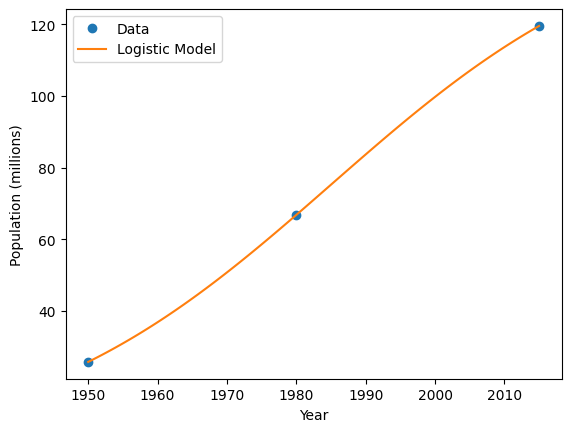

In [15]:
def plot_logistic_model(df, params):
  """
  Plots the population data and the fitted logistic curve.

  Args:
    df: DataFrame with 'year' and 'population' columns
    params: Fitted parameters (K, r, P0)
  """
  xdata = df['year']
  ydata = df['population']

  t = np.linspace(xdata.min(), xdata.max(), 100)
  y_pred = logistic_function(t, *params)

  plt.plot(xdata, ydata, 'o', label='Data')
  plt.plot(t, y_pred, '-', label='Logistic Model')
  plt.xlabel('Year')
  plt.ylabel('Population (millions)')
  plt.legend()
  plt.show()

# Plot the results
plot_logistic_model(df, params)
